In [65]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [66]:
urls = [
    "https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=drive_link",
    "https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=drive_link",
    "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=drive_link",
    "https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=drive_link"
]

file_names = ["df_prod.csv", "df_orders.csv", "df_orderlines.csv", "df_brands.csv"]

def read_csv_from_drive(url, file_name):
    path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
    return pd.read_csv(path)

df_prod, df_orders, df_orderlines, df_brands = [read_csv_from_drive(url, file_name) for url, file_name in zip(urls, file_names)]

df_prod.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


In [77]:
# Define the file path
folder_path = r"/Users/MarwanRadi1/Documents/Data_Science_Bootcamp/Bootcamp/Chapter_3_Data_Cleaning/ENIAC_Project/cleaned_datasets/v2"

# Rather manual stuff. But for an automated way, see Alternative II below 
df_merged_ol_prod = pd.read_csv(f"{folder_path}/df_merged_ol_prod.csv")
df_merged_ol_prod_ord = pd.read_csv(f"{folder_path}/df_merged_ol_prod_ord.csv")
df_prod_cleaned = pd.read_csv(f"{folder_path}/products_cleaned.csv")
#df_ord = pd.read_csv(f"{folder_path}\\orders.csv")
#df_orderlines = pd.read_csv(f"{folder_path}\\orderlines.csv")
#df_brands = pd.read_csv(f"{folder_path}\\brands.csv")

In [78]:
df_orders_copy = df_orders.copy()
df_orderlines_copy = df_orderlines.copy()
df_prod_copy = df_prod.copy()
df_brands_copy = df_brands.copy()
df_prod_cleaned_copy = df_prod_cleaned.copy()

In [95]:
df_prod_copy = df_prod_copy.drop_duplicates()
df_brands_copy.duplicated().sum()

0

In [97]:
df_prod_cleaned_copy.duplicated().sum()

0

In [98]:
df_prod_cleaned_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10157 entries, 0 to 10156
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sku              10157 non-null  object 
 1   name             10157 non-null  object 
 2   desc             10157 non-null  object 
 3   price            10157 non-null  float64
 4   promo_price      10157 non-null  object 
 5   in_stock         10157 non-null  int64  
 6   type             10110 non-null  object 
 7   mod_price        10157 non-null  float64
 8   mod_promo_price  10157 non-null  float64
 9   discount         10157 non-null  float64
 10  discount_share   10157 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 873.0+ KB


In [72]:
#Lets check if it works!
df_merged_ol_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48930 entries, 0 to 48929
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_order                   48930 non-null  int64  
 1   product_quantity           48930 non-null  int64  
 2   sku                        48930 non-null  object 
 3   unit_price                 48930 non-null  float64
 4   date                       48930 non-null  object 
 5   name                       48930 non-null  object 
 6   desc                       48930 non-null  object 
 7   price                      48930 non-null  float64
 8   promo_price                48930 non-null  object 
 9   in_stock                   48930 non-null  int64  
 10  type                       48927 non-null  object 
 11  mod_price                  48930 non-null  float64
 12  mod_promo_price            48930 non-null  float64
 13  discount                   48930 non-null  flo

In [79]:
#This is to find which products are not sold at all
merged_df = pd.merge(df_prod_copy, df_orderlines_copy['sku'], on='sku', how='left', indicator=True)

# Filter rows where the indicator shows 'left_only'
skus_not_sold = merged_df[merged_df['_merge'] == 'left_only']['sku']

# Display the SKUs that appear in df_prod_copy but not in df_merged_ol_prod
print(skus_not_sold)

607       KIN0008
722       SEN0021
1231      APP0233
1232      JMO0014
1233      MOB0007
           ...   
382855    BEL0376
382856    THU0060
382857    THU0061
382858    THU0062
382859    THU0063
Name: sku, Length: 4463, dtype: object


In [109]:
# Filter df_prod_cleaned_copy based on skus_not_in_df_merged
ds_prod_not_sold = df_prod_cleaned_copy[df_prod_cleaned_copy['sku'].isin(skus_not_sold)]
ds_prod_not_sold.sample(5)

,sku,name,desc,price,promo_price,in_stock,type,mod_price,mod_promo_price,discount,discount_share
1693,SEA0073,Seagate Backup Plus Slim External Hard Drive 2...,lightweight external hard drive and 25-inch ul...,110.00,989.901,0,11935397,110.00,98.99,11.01,10.01
1811,MYK0013,MyKronoz ZeBracelet 2 receiving calls Bracelet...,Bracelet sports and activities for iPhone iPad...,79.00,74.899,0,11905404,79.00,74.90,4.10,5.19
475,BEL0139,Belkin Lego iPhone Case SE / 5s / 5 Blue / Purple,Lego rigid shell for iPhone SE / 5s / 5.,29.99,99.946,0,11865403,29.99,9.99,20.00,66.67
8749,PAC2366,Synology DS218 + NAS Server | 2GB RAM | 24TB (...,NAS storage server integrated with special foc...,1344.97,10.831.787,0,12175397,1344.97,1083.18,261.79,19.46
890,GTE0039,G-Tech G-Speed ​​Studio 16TB Disk RAID Thunder...,Disk RAID Technology G-4 bay thunderbolt2 tran...,2600.88,19.299.899,0,11935397,2600.88,1929.99,670.89,25.79


In [115]:
# Assuming 'sku' is the common column
merged_df_prod_copy = pd.merge(df_prod_copy, ds_prod_not_sold, on='sku', how='left', indicator=True)

# Filter rows where the indicator shows 'left_only'
skus_sold_df = merged_df_prod_copy[merged_df_prod_copy['_merge'] == 'left_only']['sku']

# Display the SKUs that appear in df_prod_copy but not in ds_prod_not_sold
#print(skus_sold_df)
ds_prod_sold = df_prod_cleaned_copy[df_prod_cleaned_copy['sku'].isin(skus_sold_df)]
ds_prod_sold.describe()

,price,in_stock,mod_price,mod_promo_price,discount,discount_share
count,7621.00,7621.00,7621.00,7621.00,7621.00,7621.00
mean,611.61,0.24,611.61,530.19,81.43,18.94
std,1192.15,0.43,1192.15,1065.83,175.65,16.74
min,2.99,0.00,2.99,0.90,-192.80,-21.00
25%,40.00,0.00,40.00,30.79,5.01,6.25
50%,109.00,0.00,109.00,89.99,17.00,15.56
75%,587.98,0.00,587.98,469.99,69.96,26.09
max,15339.00,1.00,15339.00,14419.00,2199.01,92.24


In [116]:
ds_prod_not_sold.describe()

,price,in_stock,mod_price,mod_promo_price,discount,discount_share
count,2536.00,2536.00,2536.00,2536.00,2536.00,2536.00
mean,817.92,0.06,817.92,718.01,99.91,17.42
std,1747.63,0.24,1747.63,1605.90,197.19,16.14
min,3.79,0.00,3.79,2.31,-181.20,-21.00
25%,49.90,0.00,49.90,34.99,4.91,5.94
50%,149.99,0.00,149.99,124.99,17.20,14.61
75%,878.98,0.00,878.98,769.00,100.00,24.82
max,14619.00,1.00,14619.00,13742.01,2518.54,94.15


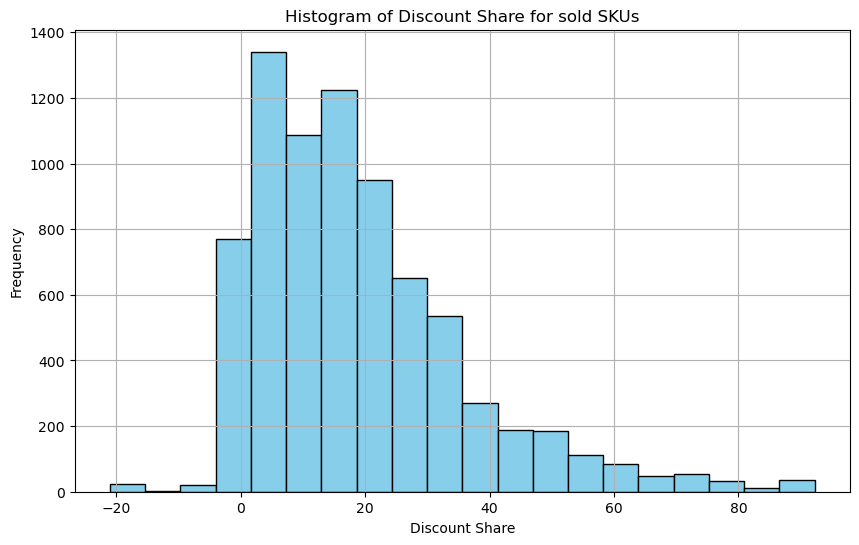

In [113]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(ds_prod_sold['discount_share'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Discount Share for sold SKUs')
plt.xlabel('Discount Share')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

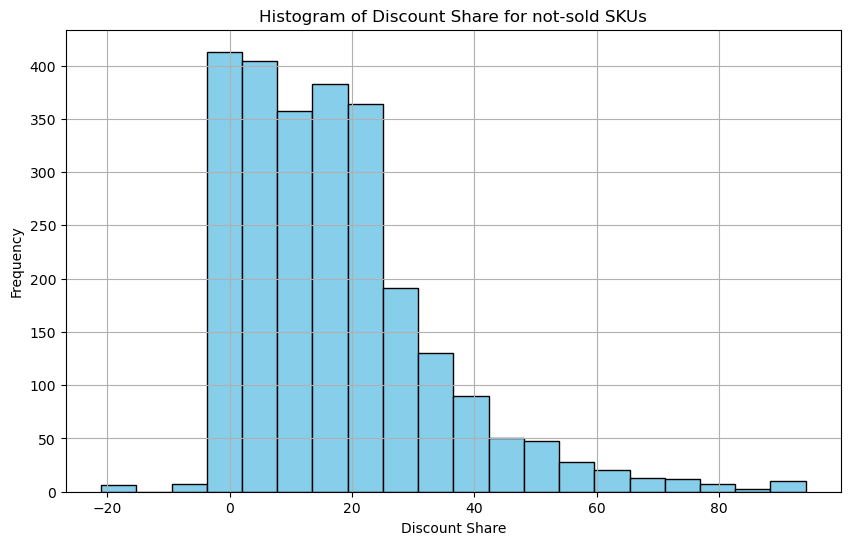

In [110]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(ds_prod_not_sold['discount_share'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Discount Share for not-sold SKUs')
plt.xlabel('Discount Share')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [55]:
df_merged_ol_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48930 entries, 0 to 48929
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_order                   48930 non-null  int64  
 1   product_quantity           48930 non-null  int64  
 2   sku                        48930 non-null  object 
 3   unit_price                 48930 non-null  float64
 4   date                       48930 non-null  object 
 5   name                       48930 non-null  object 
 6   desc                       48930 non-null  object 
 7   price                      48930 non-null  float64
 8   promo_price                48930 non-null  object 
 9   in_stock                   48930 non-null  int64  
 10  type                       48927 non-null  object 
 11  mod_price                  48930 non-null  float64
 12  mod_promo_price            48930 non-null  float64
 13  discount                   48930 non-null  flo

       mod_price   Category
0          60.99     Budget
1          22.95     Budget
2          89.00     Budget
3          76.99     Budget
4         299.95  Mid-range
...          ...        ...
48925      24.99     Budget
48926      25.00     Budget
48927      25.00     Budget
48928      25.00     Budget
48929      25.00     Budget

[48930 rows x 2 columns]


<Figure size 1200x700 with 0 Axes>

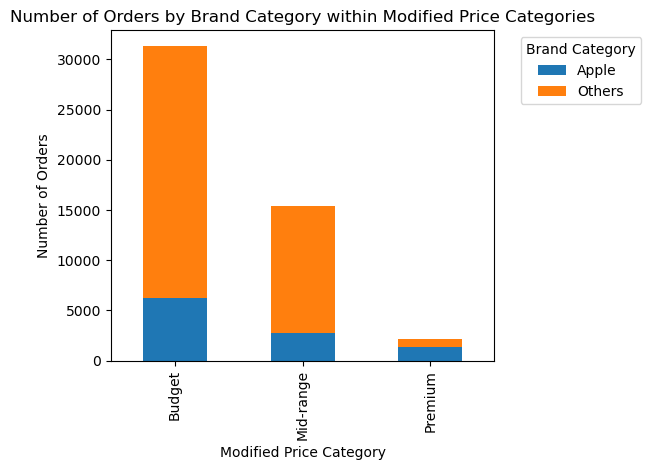

In [56]:
# Assuming df_merged_ol_prod is your DataFrame
bins = [0, 100, 500, float('inf')]  # Define the bins for the price ranges
labels = ['Budget', 'Mid-range', 'Premium']  # Define the labels for each category

# Create the 'Category' column based on 'mod_price' ranges
df_merged_ol_prod['Category'] = pd.cut(df_merged_ol_prod['mod_price'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame with the new 'Category' column
print(df_merged_ol_prod[['mod_price', 'Category']])


# Create the 'Brand_Category' column based on brands and the presence of "Apple" in the name
apple_brands = ['Apple']  # Add more brands if needed
df_merged_ol_prod['Brand_Category'] = df_merged_ol_prod.apply(lambda row: 'Apple' if any(brand.lower() in row['name'].lower() for brand in apple_brands) else 'Others', axis=1)

# Count the number of orders for each 'Brand_Category' within 'Category'
brand_category_counts = df_merged_ol_prod.groupby(['Category', 'Brand_Category']).size().unstack(fill_value=0)

# Plot the bar plot for 'Brand_Category' within 'Category'
plt.figure(figsize=(12, 7))
brand_category_plot = brand_category_counts.plot(kind='bar', stacked=True)
plt.xlabel('Modified Price Category')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Brand Category within Modified Price Categories')

# Add legend
plt.legend(title='Brand Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

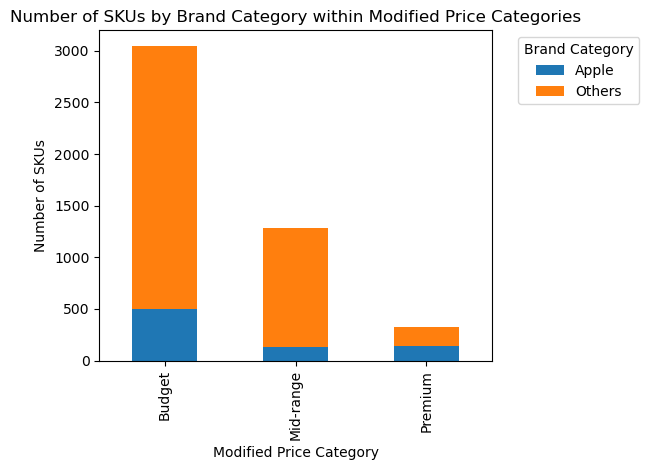

In [57]:
# Count the number of SKUs for each 'Brand_Category' within 'Category'
brand_category_sku_counts = df_merged_ol_prod.groupby(['Category', 'Brand_Category'])['sku'].nunique().unstack(fill_value=0)

# Plot the bar plot for 'Brand_Category' within 'Category' with the number of SKUs on the y-axis
plt.figure(figsize=(12, 7))
brand_category_sku_plot = brand_category_sku_counts.plot(kind='bar', stacked=True)
plt.xlabel('Modified Price Category')
plt.ylabel('Number of SKUs')
plt.title('Number of SKUs by Brand Category within Modified Price Categories')

# Add legend
plt.legend(title='Brand Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


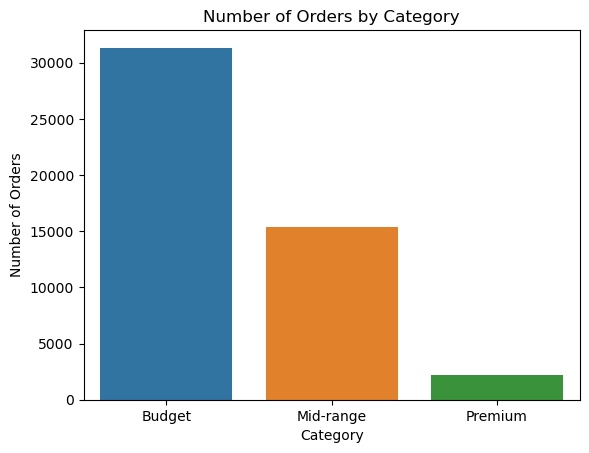

In [58]:
# Count the number of orders for each category
category_counts = df_merged_ol_prod['Category'].value_counts()

# Plot the bar plot
sns.barplot(x=category_counts.index, y=category_counts.values)

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Category')

# Display the plot
plt.show()

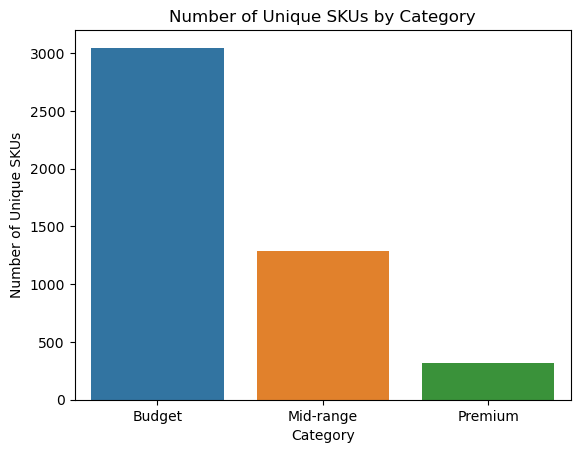

In [59]:
# Group by 'Category' and count the number of unique SKUs
category_sku_counts = df_merged_ol_prod.groupby('Category')['sku'].nunique()

# Plot the bar plot
sns.barplot(x=category_sku_counts.index, y=category_sku_counts.values)

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Number of Unique SKUs')
plt.title('Number of Unique SKUs by Category')

# Display the plot
plt.show()

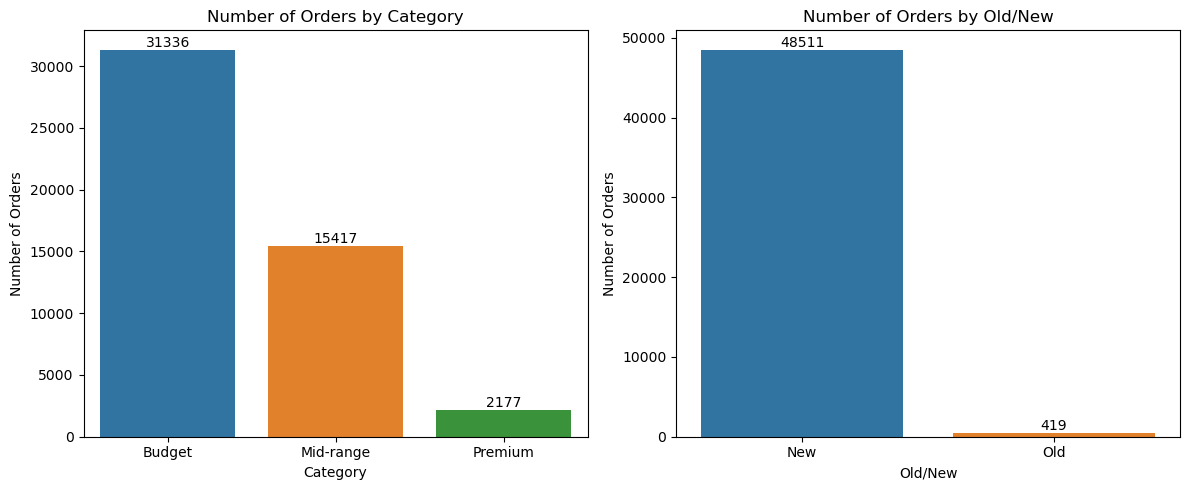

In [60]:
# Create the 'Category' column based on 'mod_price' ranges
bins = [0, 100, 500, float('inf')]
labels = ['Budget', 'Mid-range', 'Premium']
df_merged_ol_prod['Category'] = pd.cut(df_merged_ol_prod['mod_price'], bins=bins, labels=labels, right=False)

# Create the 'Old/New' column based on the presence of 'refurbished' in the description
#df_merged_ol_prod['Old/New'] = df_merged_ol_prod['desc'].apply(lambda x: 'Old' if 'refurbished' in x.lower() else 'New')
df_merged_ol_prod['Old/New'] = df_merged_ol_prod['desc'].apply(lambda x: 'Old' if ('refurbished' in x.lower() or 'reconditioned' in x.lower()) else 'New')

# Count the number of orders for each 'Category' and 'Old/New'
category_counts = df_merged_ol_prod['Category'].value_counts()
old_new_counts = df_merged_ol_prod['Old/New'].value_counts()

# Plot the bar plots for 'Category' and 'Old/New' with labels on top of bars
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Bar plot for 'Category' with labels
category_plot = sns.barplot(x=category_counts.index, y=category_counts.values, ax=axes[0])
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Number of Orders')
axes[0].set_title('Number of Orders by Category')

# Add labels on top of the bars
for index, value in enumerate(category_counts.values):
    category_plot.text(index, value + 0.1, str(value), ha='center', va='bottom')

# Bar plot for 'Old/New' with labels
old_new_plot = sns.barplot(x=old_new_counts.index, y=old_new_counts.values, ax=axes[1])
axes[1].set_xlabel('Old/New')
axes[1].set_ylabel('Number of Orders')
axes[1].set_title('Number of Orders by Old/New')

# Add labels on top of the bars
for index, value in enumerate(old_new_counts.values):
    old_new_plot.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

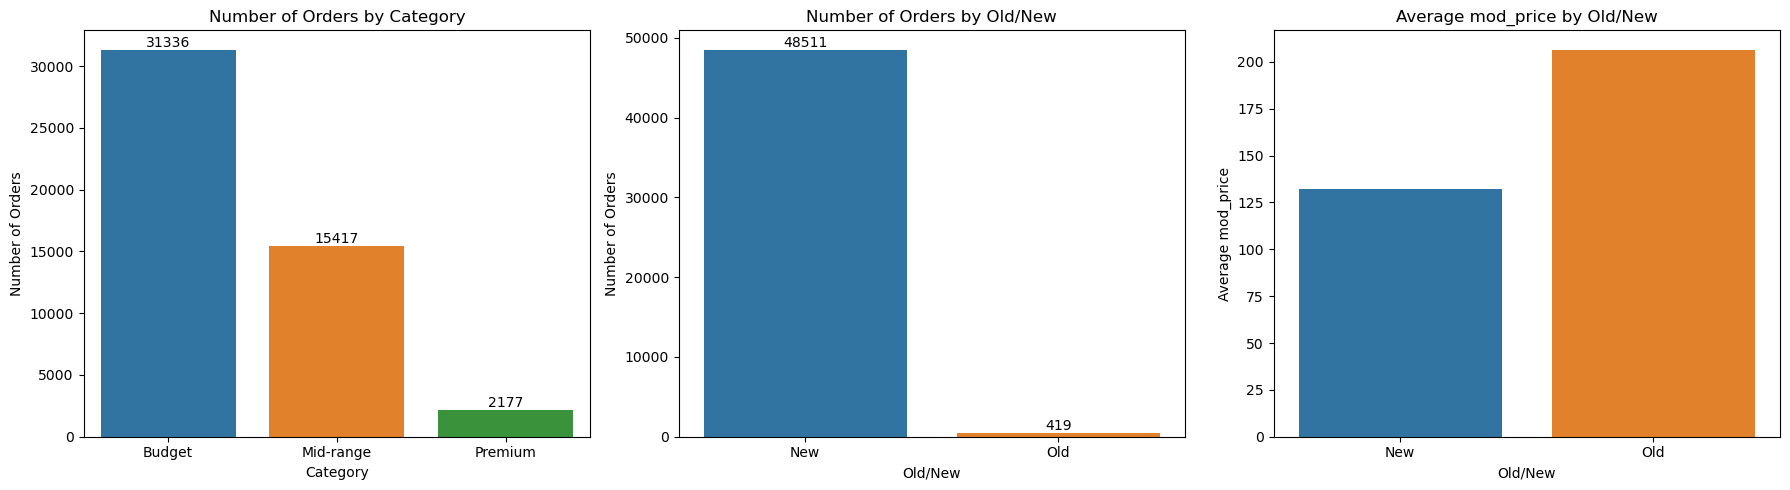

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your previous code for data preparation)

# Create the 'Category' column based on 'mod_price' ranges
bins = [0, 100, 500, float('inf')]
labels = ['Budget', 'Mid-range', 'Premium']
df_merged_ol_prod['Category'] = pd.cut(df_merged_ol_prod['mod_price'], bins=bins, labels=labels, right=False)

# Create the 'Old/New' column based on the presence of 'refurbished' in the description
# df_merged_ol_prod['Old/New'] = df_merged_ol_prod['desc'].apply(lambda x: 'Old' if 'refurbished' in x.lower() else 'New')
df_merged_ol_prod['Old/New'] = df_merged_ol_prod['desc'].apply(lambda x: 'Old' if ('refurbished' in x.lower() or 'reconditioned' in x.lower()) else 'New')

# Count the number of orders for each 'Category' and 'Old/New'
category_counts = df_merged_ol_prod['Category'].value_counts()
old_new_counts = df_merged_ol_prod['Old/New'].value_counts()

# Calculate average mod_price for Old and New products
average_prices = df_merged_ol_prod.groupby('Old/New')['mod_price'].mean()

# Plot the bar plots for 'Category' and 'Old/New' with labels on top of bars
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Bar plot for 'Category' with labels
category_plot = sns.barplot(x=category_counts.index, y=category_counts.values, ax=axes[0])
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Number of Orders')
axes[0].set_title('Number of Orders by Category')

# Add labels on top of the bars
for index, value in enumerate(category_counts.values):
    category_plot.text(index, value + 0.1, str(value), ha='center', va='bottom')

# Bar plot for 'Old/New' with labels
old_new_plot = sns.barplot(x=old_new_counts.index, y=old_new_counts.values, ax=axes[1])
axes[1].set_xlabel('Old/New')
axes[1].set_ylabel('Number of Orders')
axes[1].set_title('Number of Orders by Old/New')

# Add labels on top of the bars
for index, value in enumerate(old_new_counts.values):
    old_new_plot.text(index, value + 0.1, str(value), ha='center', va='bottom')

# Bar plot for average mod_price by Old/New
sns.barplot(x=average_prices.index, y=average_prices.values, ax=axes[2])
axes[2].set_xlabel('Old/New')
axes[2].set_ylabel('Average mod_price')
axes[2].set_title('Average mod_price by Old/New')

plt.tight_layout()
plt.show()


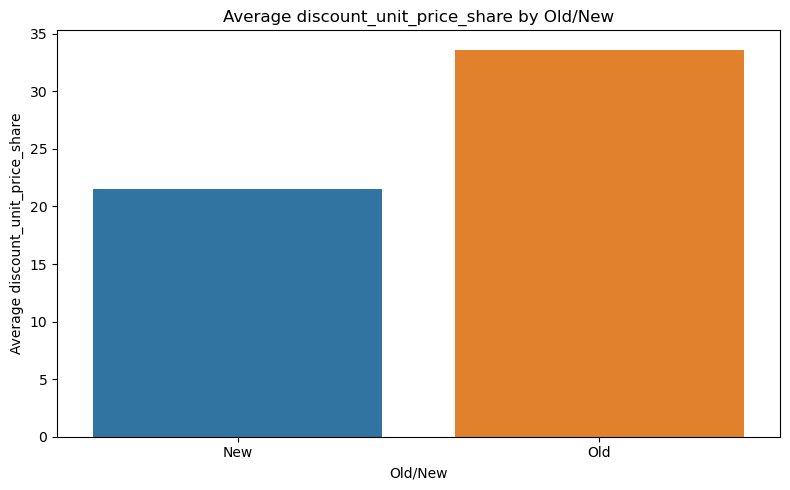

In [62]:
# Calculate average discount_unit_price_share for Old and New products
average_discount_share = df_merged_ol_prod.groupby('Old/New')['discount_unit_price_share'].mean()

# Plot the bar plot for average discount_unit_price_share by Old/New
plt.figure(figsize=(8, 5))
sns.barplot(x=average_discount_share.index, y=average_discount_share.values)
plt.xlabel('Old/New')
plt.ylabel('Average discount_unit_price_share')
plt.title('Average discount_unit_price_share by Old/New')

plt.tight_layout()
plt.show()


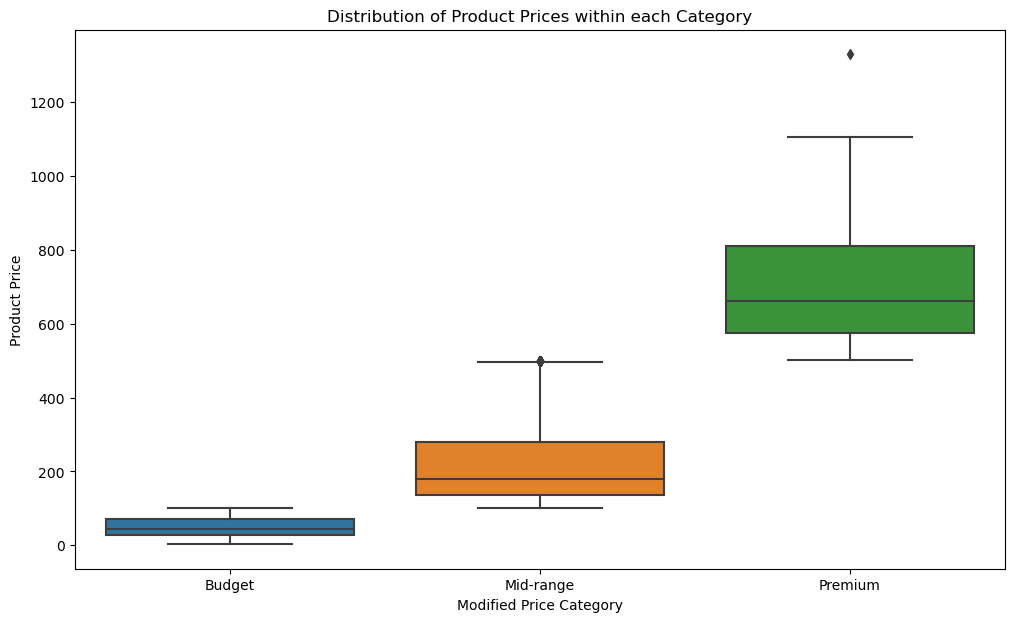

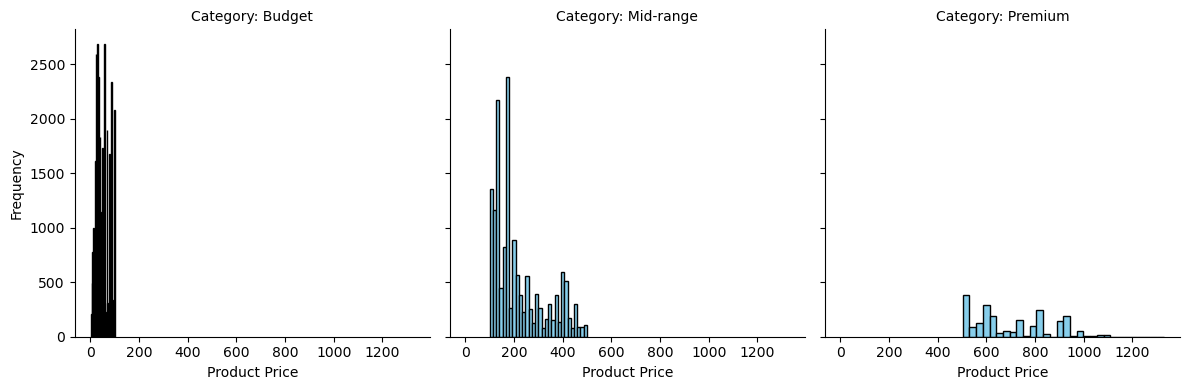

In [63]:
# Calculate summary statistics for product prices within each category
price_summary_stats = df_merged_ol_prod.groupby('Category')['mod_price'].describe()

# Create box plots to show the price distribution within each category
plt.figure(figsize=(12, 7))
sns.boxplot(x='Category', y='mod_price', data=df_merged_ol_prod)
plt.xlabel('Modified Price Category')
plt.ylabel('Product Price')
plt.title('Distribution of Product Prices within each Category')

# Create histograms for each category
g = sns.FacetGrid(df_merged_ol_prod, col='Category', col_wrap=3, height=4)
g.map(plt.hist, 'mod_price', bins=30, color='skyblue', edgecolor='black')
g.set_axis_labels('Product Price', 'Frequency')
g.set_titles('Category: {col_name}')

plt.tight_layout()
plt.show()


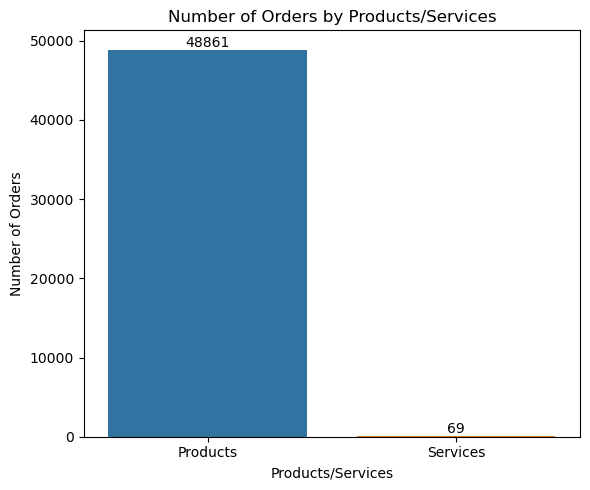

In [64]:
# Create the 'Products/Services' column based on keywords in name or description
keywords = ['repair']

df_merged_ol_prod['Products/Services'] = df_merged_ol_prod['name'].str.lower().apply(lambda x: 'Services' if any(keyword in x for keyword in keywords) else 'Products')

# Count the number of orders for each 'Products/Services'
products_services_counts = df_merged_ol_prod['Products/Services'].value_counts()

# Plot the bar plot for 'Products/Services' with labels on top of bars
plt.figure(figsize=(6, 5))
products_services_plot = sns.barplot(x=products_services_counts.index, y=products_services_counts.values)
plt.xlabel('Products/Services')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Products/Services')

# Add labels on top of the bars
for index, value in enumerate(products_services_counts.values):
    products_services_plot.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()